# Title: Titanic Survival Prediction: A Classification Approach
by VINODHINI RAJAMANICKAM

In this project, we aim to tackle the Titanic survival prediction problem using classification algorithms. By leveraging a dataset containing information about the passengers aboard the Titanic, including their characteristics and fate, we will develop a model capable of accurately predicting whether an individual would have survived the disaster or not.

Our primary objective is to explore various classification techniques and evaluate their performance in predicting survival outcomes. We will employ well-established algorithms such as logistic regression, decision trees, random forests, and support vector machines. Through this comparative analysis, we seek to identify the most effective algorithm for this specific problem.

## import libraries

In [1]:
#data manipulation
import pandas as pd

#train test split
from sklearn.model_selection import train_test_split

#encoding
from sklearn.preprocessing import OneHotEncoder

#visualization
import seaborn as sns

# for replacing null values
import numpy as np

#scaling
from sklearn.preprocessing import StandardScaler

#track time
import time

#algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Evaluation
from sklearn.metrics import f1_score , plot_confusion_matrix,confusion_matrix, accuracy_score

#Parameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Read data

In [2]:
#read data
data = pd.read_csv("titanic_train_data.csv")

In [3]:
#view data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#check for basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#check for statistical details
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#checking the shape of the data
data.shape

(891, 12)

In [7]:
#printing name of the columns
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
#checking for number of unique values in each columns
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## Defining X and y values

Since we  focus on predicting the survival outcome of the Titanic disaster. Our target column, denoting survival, will be represented as y, while the remaining columns containing passenger characteristics will be represented as X.

In [9]:
y = data["Survived"]
X = data.drop("Survived", axis = 1)

In [10]:
#print y
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [11]:
#print X
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Train Test Split

To split the data into training and testing sets, we will utilize the train_test_split module. This module allows us to divide our dataset into two separate subsets: one for training our classification model and the other for evaluating its performance.
    
module : from sklearn.model_selection import train_test_split

In [12]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

splitting training data into 80% and testing data into 20%, we will set the random_state parameter to 1

## Data Preprocessing

### Filling null values

#### column: Age

##### training dataset

In [13]:
#check for the shape of  X_train
X_train.shape

(712, 11)

In [14]:
#check for null values in X_train
X_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            144
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          547
Embarked         2
dtype: int64

it appears that the "Age," "Cabin," and "Embarked" columns contain null values. To address this, we will fill in the missing values separately for the training and test datasets.

For the "Age" column,We will calculate the median age from the training data and test data separately and use it to fill in the missing values for both the training and test datasets.

As for the "Embarked" column, which represents the port of embarkation, we will replace missing values with the mode (most frequently occurring value) of the respective dataset.

Since the "Cabin" column is not needed for our analysis, we will remove it from the dataset entirely.

In [15]:
#calculate median of "Age" column in X_train dataset
X_train.Age.median()

29.0

In [16]:
#fill null vales in "Age" column with median 
X_train.Age = X_train.Age.fillna(X_train.Age.median())

In [17]:
# check for null values in "Age" column after filling  null values
X_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          547
Embarked         2
dtype: int64

#### test dataset

In [18]:
#check for null values in X_test
X_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             33
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          140
Embarked         0
dtype: int64

In [19]:
#fill null values of "Age " column in X_test (test dataset) using median of "Age" column in X_test
X_test.Age = X_test.Age.fillna(X_test.Age.median())

#### column : Embarked

library : import numpy as np

##### training dataset

In [20]:
#check for unique values in "Embarked" column
X_train["Embarked"].value_counts()

S    513
C    133
Q     64
Name: Embarked, dtype: int64

In [21]:
#replacing null value in embarked column of train data with most occuring value i.e "S"

X_train.Embarked = X_train.Embarked.replace(np.nan, "S")

In [22]:
#check for  null values in Embarked column for train data after filling null values
X_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          547
Embarked         0
dtype: int64

##### test dataset

In [23]:
#replacing null value in embarked column of test data with most occuring value i.e "S"
X_test.Embarked = X_test.Embarked.replace(np.nan, "S")

In [24]:
#check for null values in Embarked column for test data after filling null values
X_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          140
Embarked         0
dtype: int64

### Removing unnecessary columns

In [25]:
#drop columns from train data
cols  = ["Name","Ticket","Cabin","PassengerId"]
X_train = X_train.drop(cols,axis = 1)

In [26]:
#check for null values in trainig data
X_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [27]:
#drop columns from test data
X_test = X_test.drop(cols,axis = 1)

In [28]:
#check for null values in test data
X_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [29]:
#check for the shape of train data
X_train.shape

(712, 7)

In [30]:
#check for the shape of test data
X_test.shape

(179, 7)

In [31]:
#view train data
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
301,3,male,29.0,2,0,23.2500,Q
309,1,female,30.0,0,0,56.9292,C
516,2,female,34.0,0,0,10.5000,S
120,2,male,21.0,2,0,73.5000,S
570,2,male,62.0,0,0,10.5000,S


In [32]:
#view test data
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
862,1,female,48.0,0,0,25.9292,S
223,3,male,27.0,0,0,7.8958,S
84,2,female,17.0,0,0,10.5000,S
680,3,female,27.0,0,0,8.1375,Q
535,2,female,7.0,0,2,26.2500,S


### Encoding 

library : from sklearn.preprocessing import OneHotEncoder

In [33]:
# initialize OneHotEncoder
OHE = OneHotEncoder(sparse = False)

##### training data

In [34]:
#take out categorical column which is to be encoded
X_train[["Sex","Embarked"]]

,Sex,Embarked
301,male,Q
309,female,C
516,female,S
120,male,S
570,male,S
...,...,...
715,male,S
767,female,Q
72,male,S
235,female,S


In [35]:
#fit_transform OneHotEncoder to train data
OHE_columns = OHE.fit_transform(X_train[["Sex","Embarked"]])

In [36]:
#print encoded values
OHE_columns

array([[0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.]])

In [37]:
#name the encoded columns
OHE_cols_df = pd.DataFrame(OHE_columns, columns =["s1","S2","e1","e2","e3"])
OHE_cols_df

,s1,S2,e1,e2,e3
0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
707,0.0,1.0,0.0,0.0,1.0
708,1.0,0.0,0.0,1.0,0.0
709,0.0,1.0,0.0,0.0,1.0
710,1.0,0.0,0.0,0.0,1.0


In [38]:
#take out continuous columns in X_train
X_train[["Pclass","Age","SibSp","Parch","Fare"]]

,Pclass,Age,SibSp,Parch,Fare
301,3,29.0,2,0,23.2500
309,1,30.0,0,0,56.9292
516,2,34.0,0,0,10.5000
120,2,21.0,2,0,73.5000
570,2,62.0,0,0,10.5000
...,...,...,...,...,...
715,3,19.0,0,0,7.6500
767,3,30.5,0,0,7.7500
72,2,21.0,0,0,73.5000
235,3,29.0,0,0,7.5500


#### Concatenate the numerical columns with the encoded columns

In [39]:
pd.concat([X_train[["Pclass","Age","SibSp","Parch","Fare"]],OHE_cols_df],axis = 1)
#this will have many nan values 

,Pclass,Age,SibSp,Parch,Fare,s1,S2,e1,e2,e3
301,3.0,29.0,2.0,0.0,23.2500,0.0,1.0,0.0,0.0,1.0
309,1.0,30.0,0.0,0.0,56.9292,0.0,1.0,1.0,0.0,0.0
516,2.0,34.0,0.0,0.0,10.5000,1.0,0.0,0.0,1.0,0.0
120,2.0,21.0,2.0,0.0,73.5000,0.0,1.0,0.0,1.0,0.0
570,2.0,62.0,0.0,0.0,10.5000,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
692,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,1.0
702,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,0.0
703,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,1.0
708,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0


In [40]:
#reset the index of train data
X_train.reset_index(drop = True, inplace = True)
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,29.0,2,0,23.2500,Q
1,1,female,30.0,0,0,56.9292,C
2,2,female,34.0,0,0,10.5000,S
3,2,male,21.0,2,0,73.5000,S
4,2,male,62.0,0,0,10.5000,S
...,...,...,...,...,...,...,...
707,3,male,19.0,0,0,7.6500,S
708,3,female,30.5,0,0,7.7500,Q
709,2,male,21.0,0,0,73.5000,S
710,3,female,29.0,0,0,7.5500,S


In [41]:
#reset the index of encoded data
OHE_cols_df.reset_index(drop = True, inplace = True)
OHE_cols_df

,s1,S2,e1,e2,e3
0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
707,0.0,1.0,0.0,0.0,1.0
708,1.0,0.0,0.0,1.0,0.0
709,0.0,1.0,0.0,0.0,1.0
710,1.0,0.0,0.0,0.0,1.0


In [42]:
#concatenate the datas as final train data set
X_train1 = pd.concat([X_train[["Pclass","Age","SibSp","Parch","Fare"]],OHE_cols_df],axis = 1)
X_train1

,Pclass,Age,SibSp,Parch,Fare,s1,S2,e1,e2,e3
0,3,29.0,2,0,23.2500,0.0,1.0,0.0,1.0,0.0
1,1,30.0,0,0,56.9292,1.0,0.0,1.0,0.0,0.0
2,2,34.0,0,0,10.5000,1.0,0.0,0.0,0.0,1.0
3,2,21.0,2,0,73.5000,0.0,1.0,0.0,0.0,1.0
4,2,62.0,0,0,10.5000,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
707,3,19.0,0,0,7.6500,0.0,1.0,0.0,0.0,1.0
708,3,30.5,0,0,7.7500,1.0,0.0,0.0,1.0,0.0
709,2,21.0,0,0,73.5000,0.0,1.0,0.0,0.0,1.0
710,3,29.0,0,0,7.5500,1.0,0.0,0.0,0.0,1.0


##### test data

In [43]:
# fit_transform OneHotEncoder to test data
OHE_cols_test = OHE.transform(X_test[["Sex", "Embarked"]])
OHE_cols_test

array([[1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1.

In [44]:
#name the encoded columns
OHE_cols_test = pd.DataFrame(OHE_cols_test,columns =["s1","S2","e1","e2","e3"])
OHE_cols_test

,s1,S2,e1,e2,e3
0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
174,1.0,0.0,0.0,0.0,1.0
175,0.0,1.0,0.0,0.0,1.0
176,0.0,1.0,0.0,1.0,0.0
177,0.0,1.0,0.0,1.0,0.0


In [45]:
#reset index for test data
X_test.reset_index(drop = True, inplace = True)
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,female,48.0,0,0,25.9292,S
1,3,male,27.0,0,0,7.8958,S
2,2,female,17.0,0,0,10.5000,S
3,3,female,27.0,0,0,8.1375,Q
4,2,female,7.0,0,2,26.2500,S
...,...,...,...,...,...,...,...
174,1,female,49.0,0,0,25.9292,S
175,1,male,27.0,0,0,0.0000,S
176,3,male,27.0,0,0,7.7333,Q
177,3,male,21.0,0,0,7.7333,Q


In [46]:
#reset the index of encoded data
OHE_cols_test.reset_index(drop = True, inplace = True)
OHE_cols_test

,s1,S2,e1,e2,e3
0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
174,1.0,0.0,0.0,0.0,1.0
175,0.0,1.0,0.0,0.0,1.0
176,0.0,1.0,0.0,1.0,0.0
177,0.0,1.0,0.0,1.0,0.0


In [47]:
# concatenate the final test data
X_test = pd.concat([X_test[["Pclass","Age","SibSp","Parch","Fare"]],OHE_cols_test],axis = 1)
X_test

,Pclass,Age,SibSp,Parch,Fare,s1,S2,e1,e2,e3
0,1,48.0,0,0,25.9292,1.0,0.0,0.0,0.0,1.0
1,3,27.0,0,0,7.8958,0.0,1.0,0.0,0.0,1.0
2,2,17.0,0,0,10.5000,1.0,0.0,0.0,0.0,1.0
3,3,27.0,0,0,8.1375,1.0,0.0,0.0,1.0,0.0
4,2,7.0,0,2,26.2500,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
174,1,49.0,0,0,25.9292,1.0,0.0,0.0,0.0,1.0
175,1,27.0,0,0,0.0000,0.0,1.0,0.0,0.0,1.0
176,3,27.0,0,0,7.7333,0.0,1.0,0.0,1.0,0.0
177,3,21.0,0,0,7.7333,0.0,1.0,0.0,1.0,0.0


### Scaling

libraries : 

       import seaborn as sns
       from sklearn.preprocessing import StandardScaler

<AxesSubplot:>

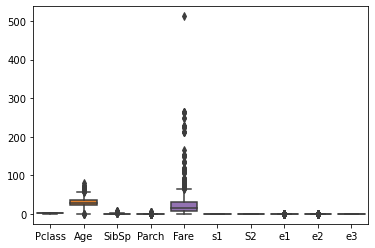

In [48]:
sns.boxplot(data = X_train1)
#we can see variance in features and outliers in "fare"

In [49]:
#initialize StandardScaler
SS = StandardScaler()

In [50]:
# fit StandardScaler to train data
X_train = SS.fit_transform(X_train1)

<AxesSubplot:>

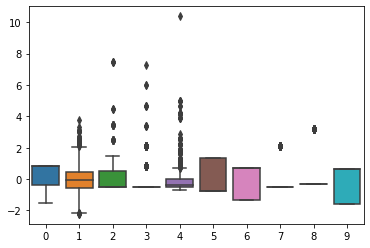

In [51]:
# plot
sns.boxplot(data = X_train)

In [52]:
#checking if data is balanced or not
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [53]:
#fit StandardScaler to test data
X_test = SS.transform(X_test)

<AxesSubplot:>

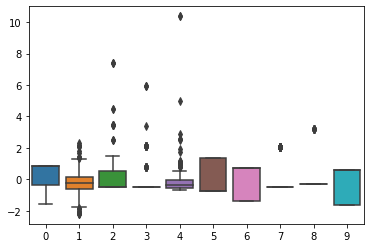

In [54]:
#plot
sns.boxplot(data = X_test)

## MODEL COMPARISON

libraries: 

    import time

    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import GradientBoostingClassifier

    from sklearn.metrics import f1_score , plot_confusion_matrix,confusion_matrix
    from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### LOGISTICS REGRESSION

In [55]:
#initialize LogisticRegression
logreg = LogisticRegression()

#training data
start = time.time()
logreg.fit(X_train, y_train)
end = time.time()
print("time taken : ", end-start)

time taken :  0.005999326705932617


In [56]:
#testing data
start = time.time()
print(logreg.score(X_test,y_test))
end = time.time()
print("time taken : ", end-start)

0.7988826815642458
time taken :  0.0010018348693847656


### SUPPORT VECTOR CLASSIFIER

In [57]:
#initialize support vector machine
svc = SVC()

#training data

start = time.time()
svc.fit(X_train, y_train)
end = time.time()
print("time taken : ", end-start)

time taken :  0.018002986907958984


In [58]:
#testing data
start = time.time()
print(svc.score(X_test,y_test))
end = time.time()
print("time taken : ", end-start)

0.776536312849162
time taken :  0.009010076522827148


### K NEAREST NEIGHBORS

In [59]:
#initialize knn
knn = KNeighborsClassifier()

#training data

start = time.time()
knn.fit(X_train, y_train)
end = time.time()
print("time taken : ", end-start)

time taken :  0.002010822296142578


In [60]:
#testing data
print(knn.score(X_test,y_test))
end = time.time()
print("time taken : ", end-start)

0.7653631284916201
time taken :  0.024017810821533203


### DECISION TREE

In [61]:
#initialize decision tree
dtc = DecisionTreeClassifier()

#training data

start = time.time()

dtc.fit(X_train, y_train)

end = time.time()

print("time taken : ", end-start)

time taken :  0.0019998550415039062


In [62]:
#testing data
print(dtc.score(X_test,y_test))
end = time.time()
print("time taken : ", end-start)

0.7597765363128491
time taken :  0.017003297805786133


### RANDOM FOREST CLASSIFIER

In [63]:
#initialize RandomForestClassifier
rfc = RandomForestClassifier()

#training data

start = time.time()
rfc.fit(X_train, y_train)
end = time.time()
print("time taken : ", end-start)

time taken :  0.16802287101745605


In [64]:
#testing data
print(rfc.score(X_test,y_test))
end = time.time()
print("time taken : ", end-start)

0.7988826815642458
time taken :  0.1870269775390625


### GRADIENT BOOSTING

In [65]:
#initialize GradientBoostingClassifier
gbc = GradientBoostingClassifier()

#training data

start = time.time()
gbc.fit(X_train, y_train)
end = time.time()
print("time taken : ", end-start)

time taken :  0.09403300285339355


In [66]:
#testing data
print(gbc.score(X_test,y_test))
end = time.time()
print("time taken : ", end-start)

0.7932960893854749
time taken :  0.11002540588378906


### comparing accuracy of each model

logistic regression : 0.7988826815642458

gradient boosting : 0.7932960893854749

random forest classifier : 0.7877094972067039

decision tree : 0.7541899441340782

k nearest neighbor :0.7653631284916201

support vector machine : 0.776536312849162

### f1 score for all the models

In [67]:
#logistics regression
y_pred_logreg = logreg.predict(X_test)
f1_score(y_test, y_pred_logreg)

0.75

In [68]:
#svc
y_pred_svc = svc.predict(X_test)
f1_score(y_test, y_pred_svc)

0.6610169491525425

In [69]:
#knn
y_pred_knn = knn.predict(X_test)
f1_score(y_test, y_pred_knn)

0.6666666666666667

In [70]:
#decision tree
y_pred_dtc = dtc.predict(X_test)
f1_score(y_test, y_pred_dtc)

0.6861313868613139

In [71]:
#rfc
y_pred_rfc = rfc.predict(X_test)
f1_score(y_test, y_pred_rfc)

0.7230769230769231

In [72]:
#gbc
y_pred_gbc = gbc.predict(X_test)
f1_score(y_test, y_pred_gbc)

0.6890756302521008

### confusion matrix for all the models

C:\Users\avino\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


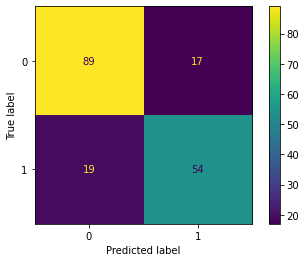

In [73]:
#logistics regression
plot_confusion_matrix(logreg,X_test, y_test)
#confusion_matrix(y_test, y_pred_logreg)

C:\Users\avino\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


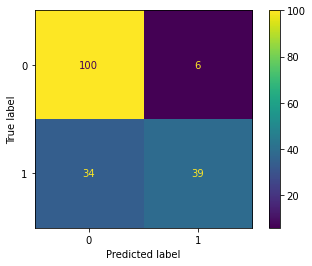

In [74]:
#support vector classifier
plot_confusion_matrix(svc,X_test, y_test)
#confusion_matrix(y_test, y_pred_svc)

C:\Users\avino\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


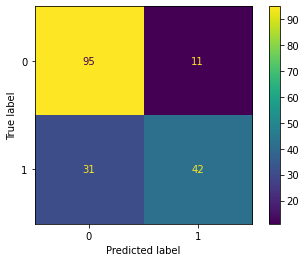

In [75]:
#k knearest neighbors
plot_confusion_matrix(knn,X_test, y_test)
#confusion_matrix(y_test, y_pred_knn)

C:\Users\avino\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


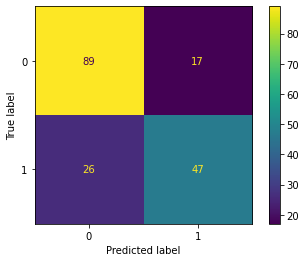

In [76]:
#decision tree classifier
plot_confusion_matrix(dtc,X_test, y_test)
#confusion_matrix(y_test, y_pred_dtc)

C:\Users\avino\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


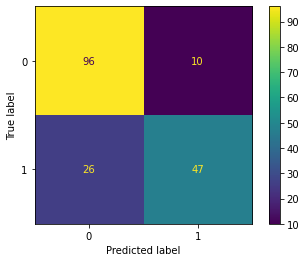

In [77]:
#random forest
plot_confusion_matrix(rfc,X_test, y_test)
#confusion_matrix(y_test, y_pred_rfc)

C:\Users\avino\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


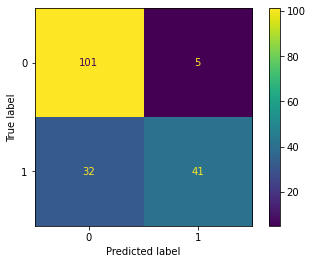

In [78]:
#gradient boosting
plot_confusion_matrix(gbc,X_test, y_test)
#confusion_matrix(y_test, y_pred_gbc)

## hyperparamater tuning

As per our evaluation metric, we have selected three best performing models to proceed with further parameter tuning: logistic regression, random forest classifier, and gradient boosting classifier.

Logistic Regression: This model is a widely used linear classification algorithm that estimates the probability of a binary outcome. It provides a good balance between simplicity and performance, making it an excellent choice for initial analysis.

Random Forest Classifier: As an ensemble method, the random forest classifier combines multiple decision trees to make predictions. It is known for its robustness, handling non-linear relationships and high-dimensional datasets effectively. Random forests often yield excellent results in classification tasks.

Gradient Boosting Classifier: Gradient boosting is another ensemble method that builds an ensemble of weak prediction models, such as decision trees, in a sequential manner. The gradient boosting classifier optimizes the loss function by adding weak models to the ensemble, resulting in powerful predictive capabilities.

By selecting these three models, we aim to cover a range of techniques and ensure a comprehensive exploration of our dataset. Further parameter tuning will enable us to optimize the models' performance and fine-tune their hyperparameters, ultimately improving their predictive accuracy.

Through this iterative process of model selection and parameter tuning, we aim to develop a robust and accurate classification model for predicting Titanic survival outcomes.

### Logistics regression

In [79]:
# Define the hyperparameters and their respective values to be tuned
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train, y_train)  # X_train and y_train are your training data

# Get the best hyperparameters and the corresponding model
best_params_logreg = grid_search.best_params_
best_model_logreg = grid_search.best_estimator_


C:\Users\avino\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\avino\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\avino\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [80]:
best_params_logreg

{'C': 1, 'penalty': 'l2', 'solver': 'saga'}

In [81]:
best_model_logreg

LogisticRegression(C=1, solver='saga')

In [82]:

# Perform predictions using the logistic regression model
logreg_predictions = best_model_logreg.predict(X_test)

# Calculate accuracy 
logreg_accuracy = accuracy_score(y_test, logreg_predictions)

# Calculate F1 score
logreg_f1 = f1_score(y_test, logreg_predictions)

# Calculate confusion matrix
logreg_cm = confusion_matrix(y_test, logreg_predictions)


In [83]:
print("logreg_accuracy : ",logreg_accuracy)
print("logreg_f1_score : ",logreg_f1)
print("logreg_confusion_matrix : \n",logreg_cm)

logreg_accuracy :  0.7988826815642458
logreg_f1_score :  0.75
logreg_confusion_matrix : 
 [[89 17]
 [19 54]]


### Random Forest Classifier

In [84]:
# Define the Random Forest Classifier
rfc = RandomForestClassifier()

# Define the hyperparameters and their respective values to be tuned
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)  # X_train and y_train are your training data

# Get the best hyperparameters and the corresponding model
best_params_rfc = grid_search.best_params_
best_model_rfc = grid_search.best_estimator_


In [85]:
best_model_rfc

RandomForestClassifier(min_samples_leaf=2, min_samples_split=10,
                       n_estimators=300)

In [86]:
best_params_rfc

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 300}

In [87]:
# Perform predictions using the random forest classifier model
rf_predictions = best_model_rfc.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Calculate F1 score
rf_f1 = f1_score(y_test, rf_predictions)

# Calculate confusion matrix
rf_cm = confusion_matrix(y_test, rf_predictions)


In [88]:
print("rfc_accuracy : ",rf_accuracy)
print("rfc_f1_score : ", rf_f1)
print("rfc_confusion_matrix : \n",rf_cm)

rfc_accuracy :  0.776536312849162
rfc_f1_score :  0.6721311475409836
rfc_confusion_matrix : 
 [[98  8]
 [32 41]]


### Gradient Boosting Classifier

In [89]:
# Define the Gradient Boosting Classifier
gbc = GradientBoostingClassifier()

# Define the hyperparameters and their respective values to be tuned
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(gbc, param_grid, cv=5)
grid_search.fit(X_train, y_train)  # X_train and y_train are your training data

# Get the best hyperparameters and the corresponding model
best_param_gbc = grid_search.best_params_
best_model_gbc = grid_search.best_estimator_


In [91]:
best_param_gbc

{'learning_rate': 0.01,
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 300}

In [92]:
best_model_gbc

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, min_samples_leaf=2,
                           min_samples_split=10, n_estimators=300)

In [93]:
# Perform predictions using the gradient boosting classifier model
gb_predictions = best_model_gbc.predict(X_test)

# Calculate accuracy
gb_accuracy = accuracy_score(y_test, gb_predictions)

# Calculate F1 score
gb_f1 = f1_score(y_test, gb_predictions)

# Calculate confusion matrix
gb_cm = confusion_matrix(y_test, gb_predictions)


In [94]:
print("gbc_accuracy : ",gb_accuracy)
print("gbc_f1_score : ",gb_f1)
print("gbc_confusion_matrix :\n ",gb_cm)

gbc_accuracy :  0.7877094972067039
gbc_f1_score :  0.6779661016949152
gbc_confusion_matrix :
  [[101   5]
 [ 33  40]]


#### predictions of above models

In [95]:
rf_predictions

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [96]:
logreg_predictions

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1], dtype=int64)

In [97]:
gb_predictions

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1], dtype=int64)

# Final Model

In [98]:
# Finalize the logistic regression model
final_model = best_model_logreg

# Print the evaluation metrics
print("Final Model Performance:")
print("Accuracy:", logreg_accuracy)
print("F1 Score:", logreg_f1)
print("Confusion Matrix:\n", logreg_cm)


Final Model Performance:
Accuracy: 0.7988826815642458
F1 Score: 0.75
Confusion Matrix:
 [[89 17]
 [19 54]]


### conclusion

In this project, we embarked on predicting the survival outcomes of the Titanic disaster using classification algorithms. After exploring and evaluating different models, including logistic regression, random forest classifier, and gradient boosting classifier, I have reached the following conclusions:

Logistic regression demonstrated the highest accuracy and F1 score among the three models, indicating its effectiveness in predicting survival outcomes. Despite parameter tuning, the model's performance remained consistent, suggesting that the selected hyperparameters may have limited impact or that the dataset characteristics pose challenges for further improvement.

Random forest classifier and gradient boosting classifier also exhibited competitive performance, although their accuracy and F1 scores were slightly lower than logistic regression. Parameter tuning and optimization efforts may be required to enhance their predictive capabilities further.

Based on the evaluation results, I have decided to select the logistic regression model as the final model for predicting Titanic survival outcomes. While random forest classifier and gradient boosting classifier showed promise, the logistic regression model consistently demonstrated higher accuracy and F1 score.